# Getting started with gaze dataset 

In this example, we will show examples of the main functionalities included in the emtk.

This includes:
- Parsing raw data from the gaze dataset to pandas dataframe.
- Visualizing raw data, filtered fixation, saccades, and AOIs visualization.
- Applying fixation correction through setting offset.
- Generating AOIs for any gaze stimuli.
- Adding text tokens to generated AOIs.
- Adding srcML tags to AOIs and tokens.
- Performing hit test between fixations and AOIs. 

In [4]:
%load_ext autoreload
%autoreload 2  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing the tool

In [5]:
import pandas as pd
from g2c import parsers, visualization, util, aoi

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Parsing raw data from the UNL dataset

In [3]:
eye_events, samples = parsers.UNL_UM(sample_size = 50)

Processing files:   2%|▏         | 1/48 [00:02<01:39,  2.11s/file]

Processed file: UNL-UM_UO P103.tsv


Processing files:   4%|▍         | 2/48 [00:03<01:27,  1.91s/file]

Processed file: UNL-UM_UO P105.tsv


Processing files:   6%|▋         | 3/48 [00:06<01:44,  2.33s/file]

Processed file: UNL-UM_UO P107.tsv


Processing files:   8%|▊         | 4/48 [00:09<01:54,  2.61s/file]

Processed file: UNL-UM_UO P113.tsv


Processing files:  10%|█         | 5/48 [00:13<02:16,  3.17s/file]

Processed file: UNL-UM_UO P124.tsv


Processing files:  12%|█▎        | 6/48 [00:19<02:41,  3.84s/file]

Processed file: UNL-UM_UO P127.tsv


Processing files:  15%|█▍        | 7/48 [00:24<02:54,  4.26s/file]

Processed file: UNL-UM_UO P132.tsv


Processing files:  17%|█▋        | 8/48 [00:31<03:27,  5.18s/file]

Processed file: UNL-UM_UO P135.tsv


Processing files:  19%|█▉        | 9/48 [00:38<03:51,  5.94s/file]

Processed file: UNL-UM_UO P139.tsv


Processing files:  21%|██        | 10/48 [00:45<03:57,  6.24s/file]

Processed file: UNL-UM_UO P140.tsv


Processing files:  23%|██▎       | 11/48 [00:53<04:08,  6.73s/file]

Processed file: UNL-UM_UO P142.tsv


Processing files:  25%|██▌       | 12/48 [01:02<04:20,  7.24s/file]

Processed file: UNL-UM_UO P143.tsv


Processing files:  27%|██▋       | 13/48 [01:10<04:30,  7.73s/file]

Processed file: UNL-UM_UO P147.tsv


Processing files:  29%|██▉       | 14/48 [01:21<04:53,  8.62s/file]

Processed file: UNL-UM_UO P149.tsv


Processing files:  31%|███▏      | 15/48 [01:31<05:01,  9.12s/file]

Processed file: UNL-UM_UO P152.tsv


Processing files:  33%|███▎      | 16/48 [01:42<05:04,  9.51s/file]

Processed file: UNL-UM_UO P154.tsv


Processing files:  35%|███▌      | 17/48 [01:53<05:09,  9.99s/file]

Processed file: UNL-UM_UO P155.tsv


Processing files:  38%|███▊      | 18/48 [02:05<05:17, 10.59s/file]

Processed file: UNL-UM_UO P157.tsv


Processing files:  40%|███▉      | 19/48 [02:18<05:25, 11.23s/file]

Processed file: UNL-UM_UO P160.tsv


Processing files:  42%|████▏     | 20/48 [02:30<05:27, 11.69s/file]

Processed file: UNL-UM_UO P170.tsv


Processing files:  44%|████▍     | 21/48 [02:44<05:30, 12.25s/file]

Processed file: UNL-UM_UO P174.tsv


Processing files:  46%|████▌     | 22/48 [02:57<05:24, 12.48s/file]

Processed file: UNL-UM_UO P181.tsv


Processing files:  48%|████▊     | 23/48 [03:11<05:23, 12.94s/file]

Processed file: UNL-UM_UO P183.tsv


Processing files:  50%|█████     | 24/48 [03:25<05:19, 13.30s/file]

Processed file: UNL-UM_UO P192.tsv


Processing files:  52%|█████▏    | 25/48 [03:40<05:15, 13.70s/file]

Processed file: UNL-UM_UO P194.tsv


Processing files:  54%|█████▍    | 26/48 [03:55<05:12, 14.22s/file]

Processed file: UNL-UM_UO P195.tsv


Processing files:  56%|█████▋    | 27/48 [04:12<05:12, 14.87s/file]

Processed file: UNL-UM_UO P196.tsv


Processing files:  58%|█████▊    | 28/48 [04:28<05:08, 15.44s/file]

Processed file: UNL-UM_UO P198.tsv


Processing files:  60%|██████    | 29/48 [04:45<04:58, 15.72s/file]

Processed file: UNL-UM_UO P202.tsv


Processing files:  62%|██████▎   | 30/48 [05:01<04:48, 16.00s/file]

Processed file: UNL-UM_UO P220.tsv


Processing files:  65%|██████▍   | 31/48 [05:19<04:39, 16.43s/file]

Processed file: UNL-UM_UO P223.tsv


Processing files:  67%|██████▋   | 32/48 [05:36<04:28, 16.80s/file]

Processed file: UNL-UM_UO P224.tsv


Processing files:  69%|██████▉   | 33/48 [05:55<04:17, 17.20s/file]

Processed file: UNL-UM_UO P225.tsv


Processing files:  71%|███████   | 34/48 [06:14<04:09, 17.83s/file]

Processed file: UNL-UM_UO P231.tsv


Processing files:  73%|███████▎  | 35/48 [06:33<03:55, 18.08s/file]

Processed file: UNL-UM_UO P243.tsv


Processing files:  75%|███████▌  | 36/48 [06:52<03:41, 18.49s/file]

Processed file: UNL-UM_UO P246.tsv


Processing files:  77%|███████▋  | 37/48 [07:12<03:27, 18.88s/file]

Processed file: UNL-UM_UO P247.tsv


Processing files:  79%|███████▉  | 38/48 [07:33<03:16, 19.69s/file]

Processed file: UNL-UM_UO P248.tsv


Processing files:  81%|████████▏ | 39/48 [07:56<03:05, 20.56s/file]

Processed file: UNL-UM_UO P250.tsv


Processing files:  83%|████████▎ | 40/48 [08:18<02:47, 20.95s/file]

Processed file: UNL-UM_UO P252.tsv


Processing files:  85%|████████▌ | 41/48 [08:40<02:30, 21.45s/file]

Processed file: UNL-UM_UO P253.tsv


Processing files:  88%|████████▊ | 42/48 [09:04<02:13, 22.18s/file]

Processed file: UNL-UM_UO P254.tsv


Processing files:  90%|████████▉ | 43/48 [09:28<01:52, 22.47s/file]

Processed file: UNL-UM_UO P255.tsv


Processing files:  92%|█████████▏| 44/48 [09:52<01:32, 23.14s/file]

Processed file: UNL-UM_UO P256.tsv


Processing files:  94%|█████████▍| 45/48 [10:17<01:10, 23.57s/file]

Processed file: UNL-UM_UO P257.tsv


Processing files:  96%|█████████▌| 46/48 [10:43<00:48, 24.24s/file]

Processed file: UNL-UM_UO P260.tsv


Processing files:  98%|█████████▊| 47/48 [11:09<00:24, 24.99s/file]

Processed file: UNL-UM_UO P262.tsv


Processing files: 100%|██████████| 48/48 [11:37<00:00, 14.52s/file]

Processed file: UNL-UM_UO P266.tsv


In [4]:
samples.head()

eye_tracker  experiment_id participant_id            filename  \
0  Tobii I-VT (Fixation)  17623623_P103  17623623_P103  UNL-UM_UO P103.tsv   
1  Tobii I-VT (Fixation)  17623623_P103  17623623_P103  UNL-UM_UO P103.tsv   
2  Tobii I-VT (Fixation)  17623623_P103  17623623_P103  UNL-UM_UO P103.tsv   
3  Tobii I-VT (Fixation)  17623623_P103  17623623_P103  UNL-UM_UO P103.tsv   
4  Tobii I-VT (Fixation)  17623623_P103  17623623_P103  UNL-UM_UO P103.tsv   

  trial_id                    stimuli_module        stimuli_name  \
0       Q5  datasets/UNL_UM24_30July/stimuli  Q5 (localhost).png   
1       Q5  datasets/UNL_UM24_30July/stimuli  Q5 (localhost).png   
2       Q5  datasets/UNL_UM24_30July/stimuli  Q5 (localhost).png   
3       Q5  datasets/UNL_UM24_30July/stimuli  Q5 (localhost).png   
4       Q5  datasets/UNL_UM24_30July/stimuli  Q5 (localhost).png   

   Recording timestamp Project name Export date  ...  \
0               237868    UNL-UM_UO    2025/3/7  ...   
1               237875    UNL-UM_UO    2025/3/7  ...   
2               237882    UNL-UM_UO    2025/3/7  ...   
3               237883    UNL-UM_UO    2025/3/7  ...   
4               237891    UNL-UM_UO    2025/3/7  ...   

       Presented Media name  Presented Media width Presented Media height  \
0                       NaN                    NaN                    NaN   
1  ProLabQs Recording40.mp4                 1920.0                 1080.0   
2                       NaN                    NaN                    NaN   
3  ProLabQs Recording40.mp4                 1920.0                 1080.0   
4  ProLabQs Recording40.mp4                 1920.0                 1080.0   

  Presented Media position X (DACSpx) Presented Media position Y (DACSpx)  \
0                                 NaN                                 NaN   
1                                 0.0                                 0.0   
2                                 NaN                                 NaN   
3                                 0.0                                 0.0   
4                                 0.0                                 0.0   

  Original Media width Original Media height  Eye movement type  \
0                  NaN                   NaN           Fixation   
1               1920.0                1080.0            Saccade   
2                  NaN                   NaN            Saccade   
3               1920.0                1080.0            Saccade   
4               1920.0                1080.0            Saccade   

  Gaze event duration Eye movement type index  
0               567.0                   413.0  
1                42.0                   655.0  
2                42.0                   655.0  
3                42.0                   655.0  
4                42.0                   655.0  

[5 rows x 79 columns]

In [5]:
eye_events.head()

eye_tracker  experiment_id participant_id            filename  \
0  Tobii I-VT (Fixation)  17623623_P103  17623623_P103  UNL-UM_UO P103.tsv   
1  Tobii I-VT (Fixation)  17623623_P103  17623623_P103  UNL-UM_UO P103.tsv   
2  Tobii I-VT (Fixation)  17623623_P103  17623623_P103  UNL-UM_UO P103.tsv   
3  Tobii I-VT (Fixation)  17623623_P103  17623623_P103  UNL-UM_UO P103.tsv   
4  Tobii I-VT (Fixation)  17623623_P103  17623623_P103  UNL-UM_UO P103.tsv   

  trial_id                    stimuli_module        stimuli_name  timestamp  \
0       Q5  datasets/UNL_UM24_30July/stimuli  Q5 (localhost).png     237868   
1       Q5  datasets/UNL_UM24_30July/stimuli  Q5 (localhost).png     237916   
2       Q5  datasets/UNL_UM24_30July/stimuli  Q5 (localhost).png     237925   
3       Q5  datasets/UNL_UM24_30July/stimuli  Q5 (localhost).png     237933   
4       Q5  datasets/UNL_UM24_30July/stimuli  Q5 (localhost).png     237941   

   duration     x0     y0  x1  y1 token  pupil_l  pupil_r  amplitude  \
0     567.0  718.0  346.0 NaN NaN  None      NaN      NaN        NaN   
1     192.0  543.0  342.0 NaN NaN  None    3.494    3.425        NaN   
2     192.0  543.0  342.0 NaN NaN  None    3.491    3.422        NaN   
3     192.0  543.0  342.0 NaN NaN  None    3.489    3.419        NaN   
4     192.0  543.0  342.0 NaN NaN  None    3.485    3.421        NaN   

   peak_velocity eye_event_type  
0            NaN       fixation  
1            NaN       fixation  
2            NaN       fixation  
3            NaN       fixation  
4            NaN       fixation

# Visualization

### For Individual

In [7]:
experiment_id = "31424792_P195"
trial_id = 'Q4B'

### Draw Fixations

In [8]:
trial_data = eye_events.loc[(eye_events['experiment_id'] == experiment_id) & 
                            (eye_events['trial_id'] == trial_id)]

samples_data = samples.loc[(samples['experiment_id'] == experiment_id) & 
                            (samples['trial_id'] == trial_id)]

In [9]:
trial_data.head()

eye_tracker  experiment_id participant_id  \
2043468  Tobii I-VT (Fixation)  31424792_P195  31424792_P195   
2043469  Tobii I-VT (Fixation)  31424792_P195  31424792_P195   
2043470  Tobii I-VT (Fixation)  31424792_P195  31424792_P195   
2043471  Tobii I-VT (Fixation)  31424792_P195  31424792_P195   
2043472  Tobii I-VT (Fixation)  31424792_P195  31424792_P195   

                   filename trial_id                    stimuli_module  \
2043468  UNL-UM_UO P195.tsv      Q4B  datasets/UNL_UM24_30July/stimuli   
2043469  UNL-UM_UO P195.tsv      Q4B  datasets/UNL_UM24_30July/stimuli   
2043470  UNL-UM_UO P195.tsv      Q4B  datasets/UNL_UM24_30July/stimuli   
2043471  UNL-UM_UO P195.tsv      Q4B  datasets/UNL_UM24_30July/stimuli   
2043472  UNL-UM_UO P195.tsv      Q4B  datasets/UNL_UM24_30July/stimuli   

                stimuli_name  timestamp  duration     x0     y0  x1  y1 token  \
2043468  Q4B (localhost).png     926272     250.0  963.0  513.0 NaN NaN  None   
2043469  Q4B (localhost).png     926276     250.0  963.0  513.0 NaN NaN  None   
2043470  Q4B (localhost).png     926283     250.0  963.0  513.0 NaN NaN  None   
2043471  Q4B (localhost).png     926285     250.0  963.0  513.0 NaN NaN  None   
2043472  Q4B (localhost).png     926293     250.0  963.0  513.0 NaN NaN  None   

         pupil_l  pupil_r  amplitude  peak_velocity eye_event_type  
2043468      NaN      NaN        NaN            NaN       fixation  
2043469    3.063    3.181        NaN            NaN       fixation  
2043470      NaN      NaN        NaN            NaN       fixation  
2043471    3.090    3.169        NaN            NaN       fixation  
2043472    3.080    3.165        NaN            NaN       fixation

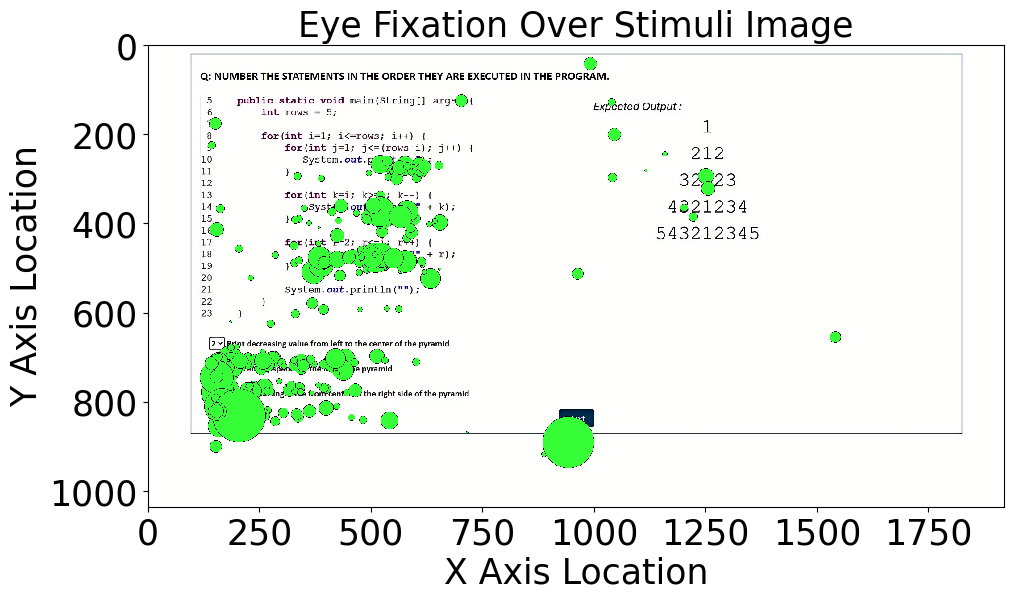

In [10]:
visualization.draw_trial(trial_data, samples_data, 
                         draw_raw_data=False, draw_fixation=True,
                        draw_saccade=False, draw_aoi=False, 
                        sample_x_col="Gaze point X [DACS px]",
                        sample_y_col="Gaze point Y [DACS px]",
                        r3=3, r5=5)

### For group

In [16]:
trial_id = 'Q5'

In [19]:
trial_data = eye_events.loc[eye_events['trial_id'] == trial_id]

samples_data = samples.loc[samples['trial_id'] == trial_id]


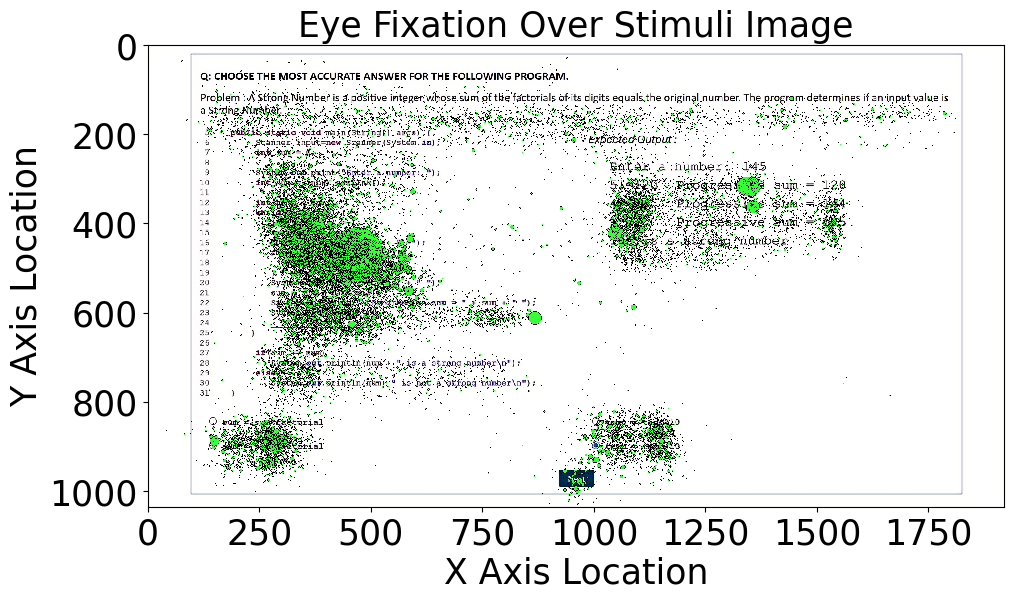

In [20]:
visualization.draw_trial(trial_data, samples_data, 
                         draw_raw_data=False, draw_fixation=True,
                        draw_saccade=False, draw_aoi=False, 
                        sample_x_col="Gaze point X [DACS px]",
                        sample_y_col="Gaze point Y [DACS px]",
                        r3=0.3,r5=0.5)

# Heatmap

### By Participant 

In [42]:
experiment_id = "31424792_P195"
trial_id = 'Q2B'

### Draw Individual Heatmap

In [43]:
# load the data
# clearn the data
trial_data = pd.DataFrame()
trial_data = eye_events.loc[(eye_events['experiment_id'] == experiment_id) & 
                            (eye_events['trial_id'] == trial_id)]

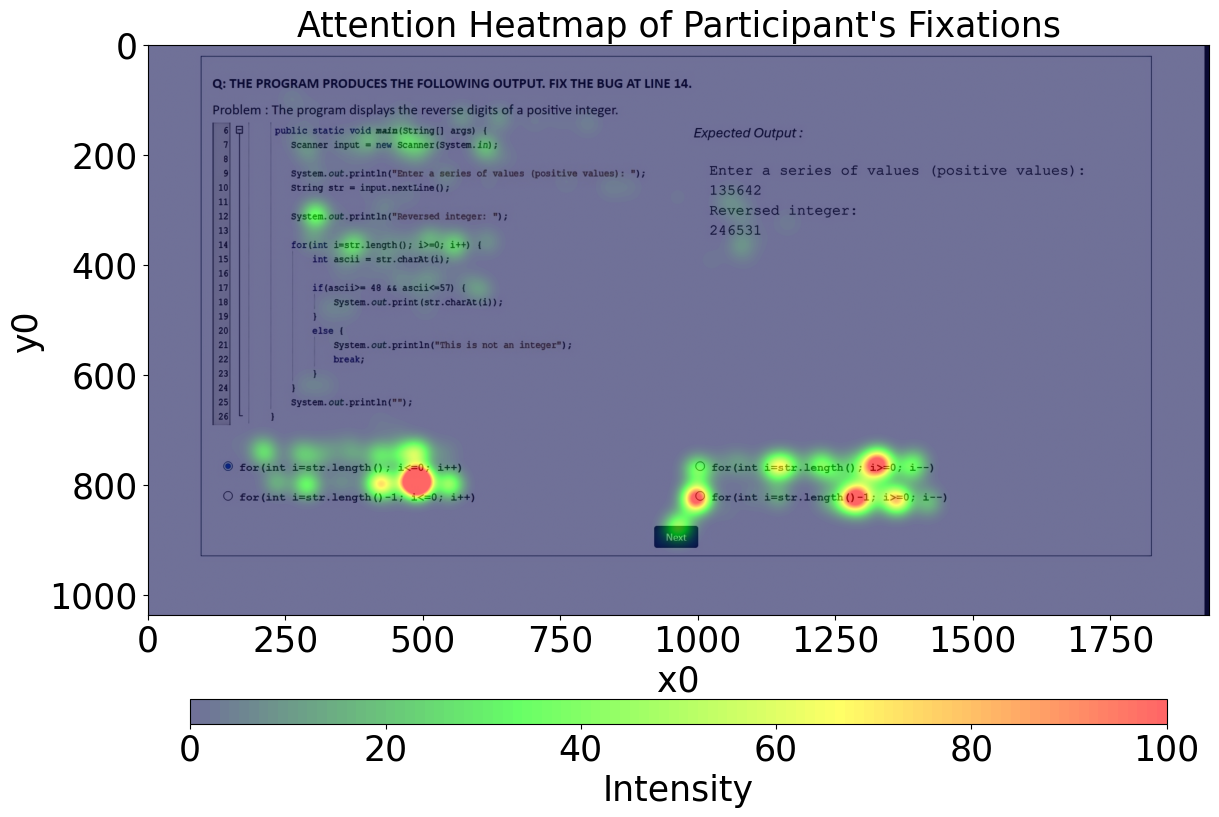

In [44]:
visualization.draw_heatmap(trial_data,contours=False,
                           figsize=(18, 10), alpha=0.6, sigma_value=17, 
                           vmin=0, vmax=100)

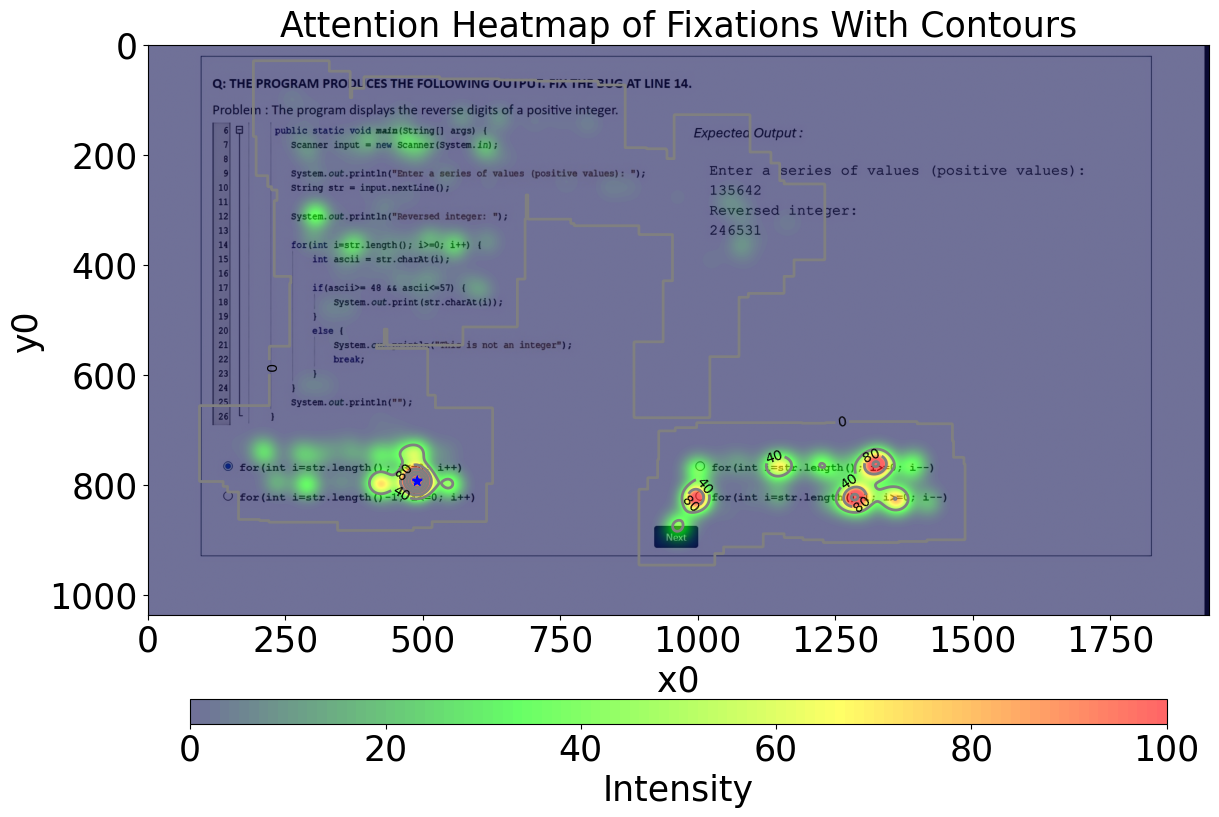

In [45]:
visualization.draw_heatmap(trial_data,contours=True,
                           figsize=(18, 10), alpha=0.6, sigma_value=17, 
                           vmin=0, vmax=100)

### By Task

In [21]:
trial_id = 'Q5'

In [22]:
trial_data = pd.DataFrame()
trial_data = eye_events.loc[eye_events['trial_id'] == trial_id]


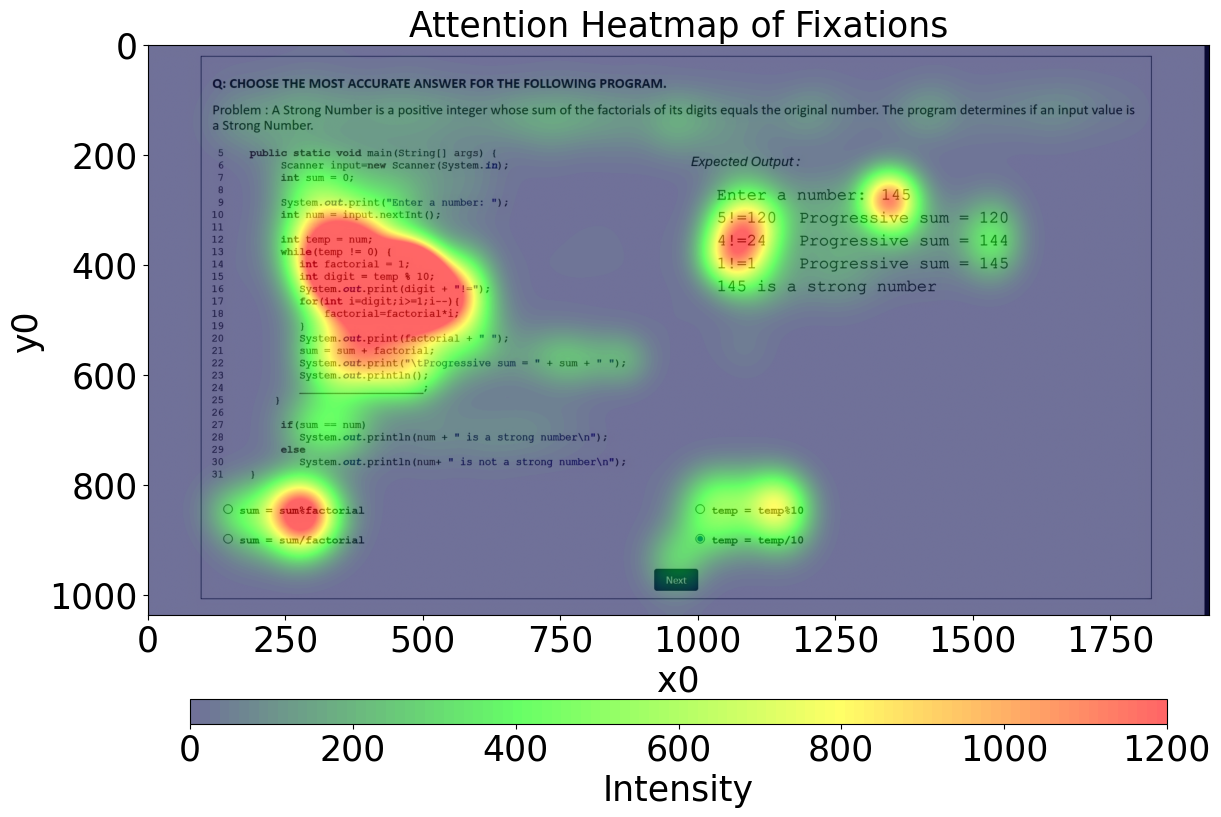

In [23]:
visualization.draw_heatmap(trial_data,contours=False, figsize=(18, 10), 
                           alpha=0.6, sigma_value=35, vmin=0, vmax=1200)

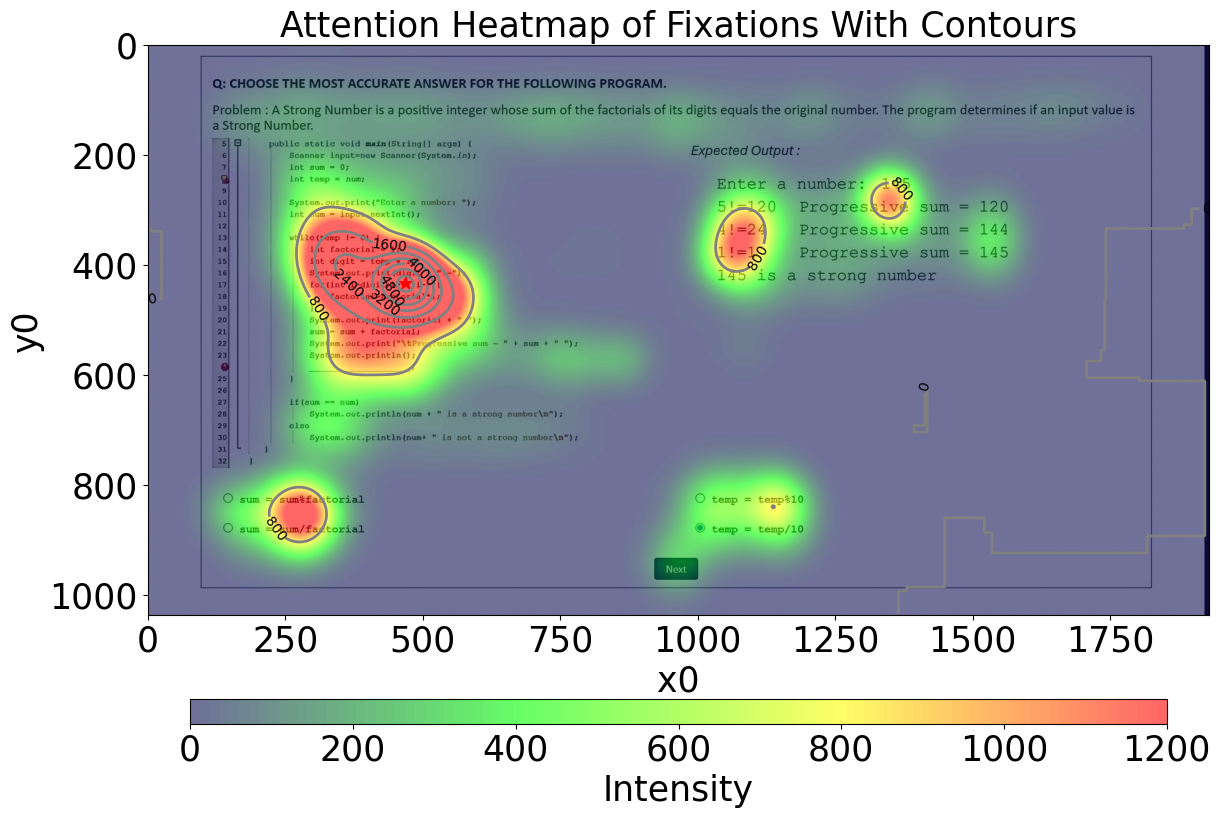

In [17]:
visualization.draw_heatmap(trial_data,contours=True,figsize=(18, 10),
                           alpha=0.6, sigma_value=35, vmin=0, vmax=1200)

# AOI Visionizer

## Fixations

### For Individual

In [3]:
participant_id = '31424792_P195'
trial_id = 'Q4B'

trial_data = pd.DataFrame()

In [ ]:
aoi_file_path = f"output/unl_um/individual/aoi/{trial_id}/aoi_fixations_{trial_id}_{participant_id}.csv"
aoi_file_path

'output/unl_um/individual/aoi/Q4B/aoi_fixations_Q4B_31424792_P195.csv'

In [5]:
trial_data = pd.read_csv(aoi_file_path)

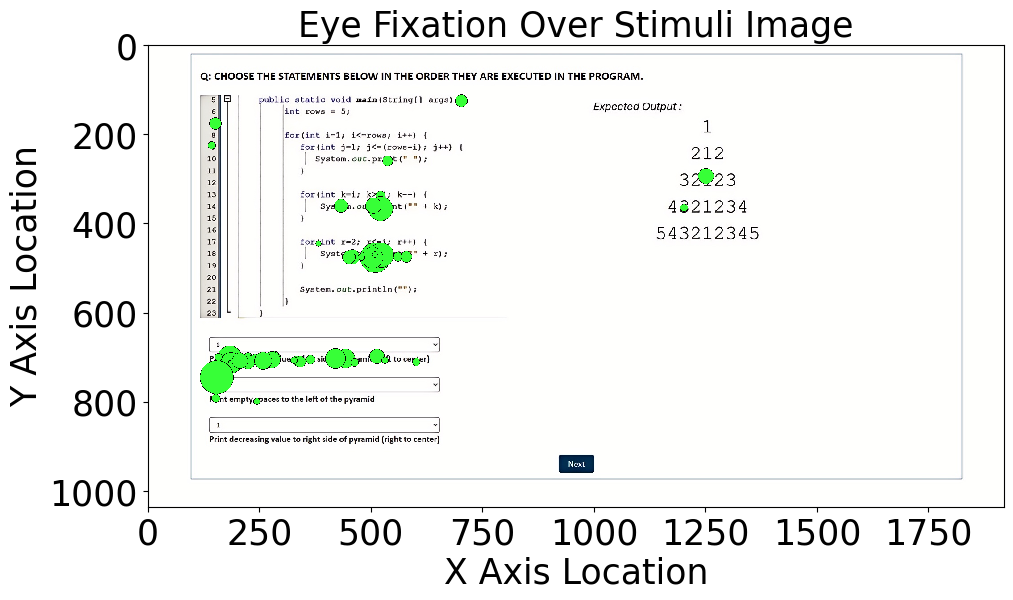

In [7]:
visualization.draw_trial(trial_data, 
                         draw_raw_data=False, draw_fixation=True,
                        draw_saccade=False, draw_aoi=False, 
                        sample_x_col="Gaze point X [DACS px]",
                        sample_y_col="Gaze point Y [DACS px]",
                        r3=3, r5=5)

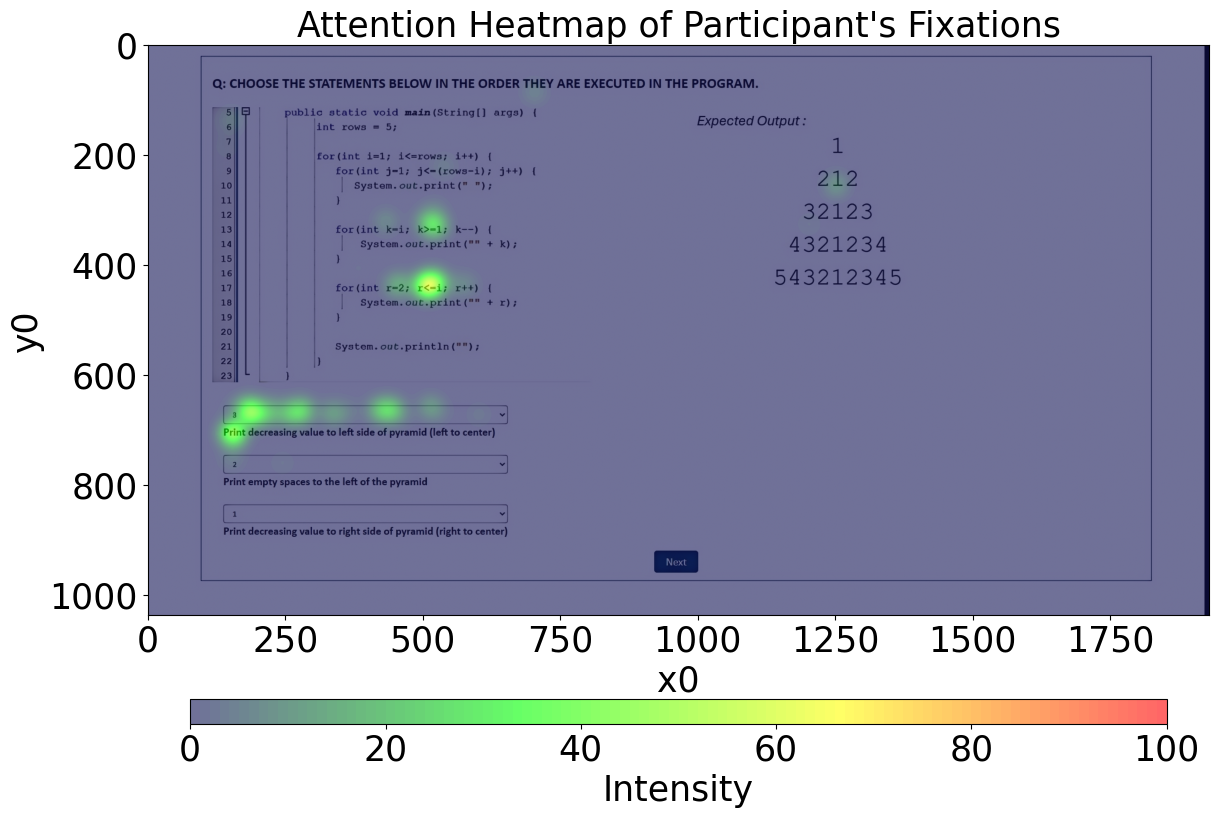

In [8]:
visualization.draw_heatmap(trial_data,contours=False,
                           figsize=(18, 10), alpha=0.6, sigma_value=17, 
                           vmin=0, vmax=100)

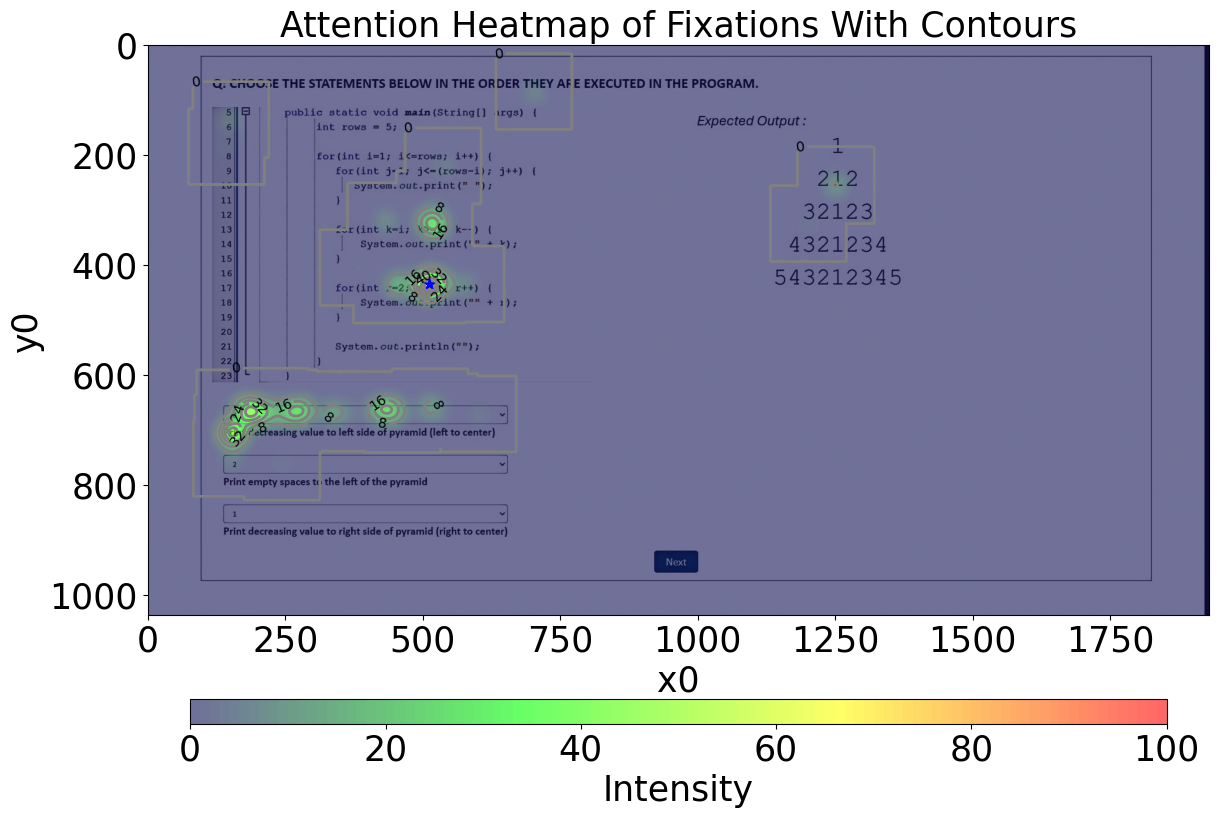

In [9]:
visualization.draw_heatmap(trial_data,contours=True,
                           figsize=(18, 10), alpha=0.6, sigma_value=17, 
                           vmin=0, vmax=100)

### For Task

In [33]:
import pandas as pd
from gstk import parsers, visualization, util, aoi

trial_id = 'Q5'

trial_data = pd.DataFrame()

In [72]:
# aoi_file_path = f"output/unl_um-30July/group/aoi/aoi_fixations_{trial_id}_nonopt.csv"
aoi_file_path = f"output/unl_um-30July/group/aoi/aoi_fixations_{trial_id}.csv"
# aoi_file_path = f"../data/dump/lstm-cnn-attention_Q5_predictions_future.csv"
aoi_file_path

'output/unl_um-30July/group/aoi/aoi_fixations_Q5.csv'

In [73]:
trial_data = pd.read_csv(aoi_file_path)

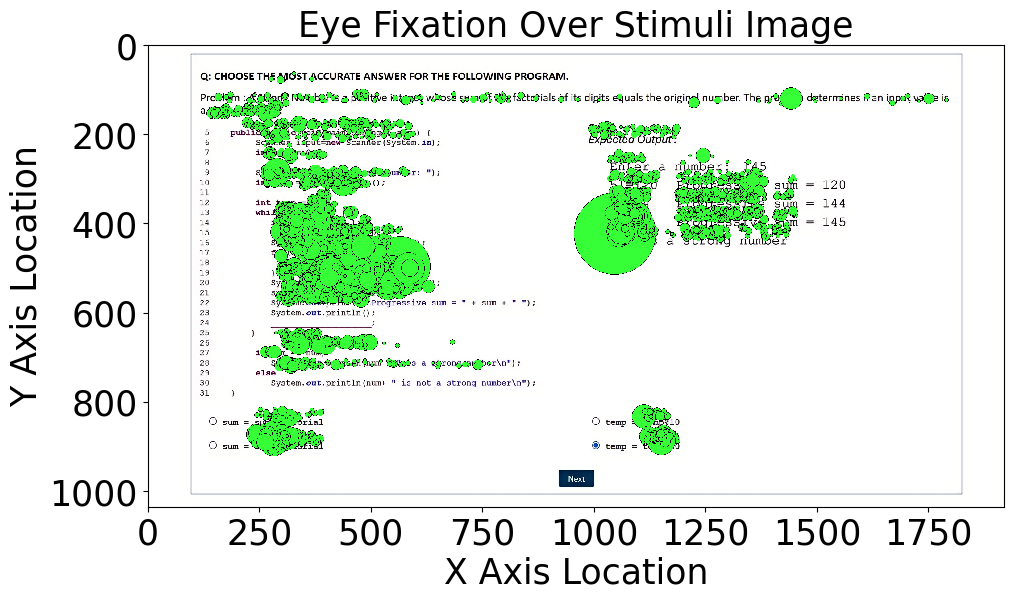

In [74]:
visualization.draw_trial(trial_data, 
                         draw_raw_data=False, draw_fixation=True,
                        draw_saccade=False, draw_aoi=False, 
                        sample_x_col="Gaze point X [DACS px]",
                        sample_y_col="Gaze point Y [DACS px]",
                        r3=.1, r5=3)

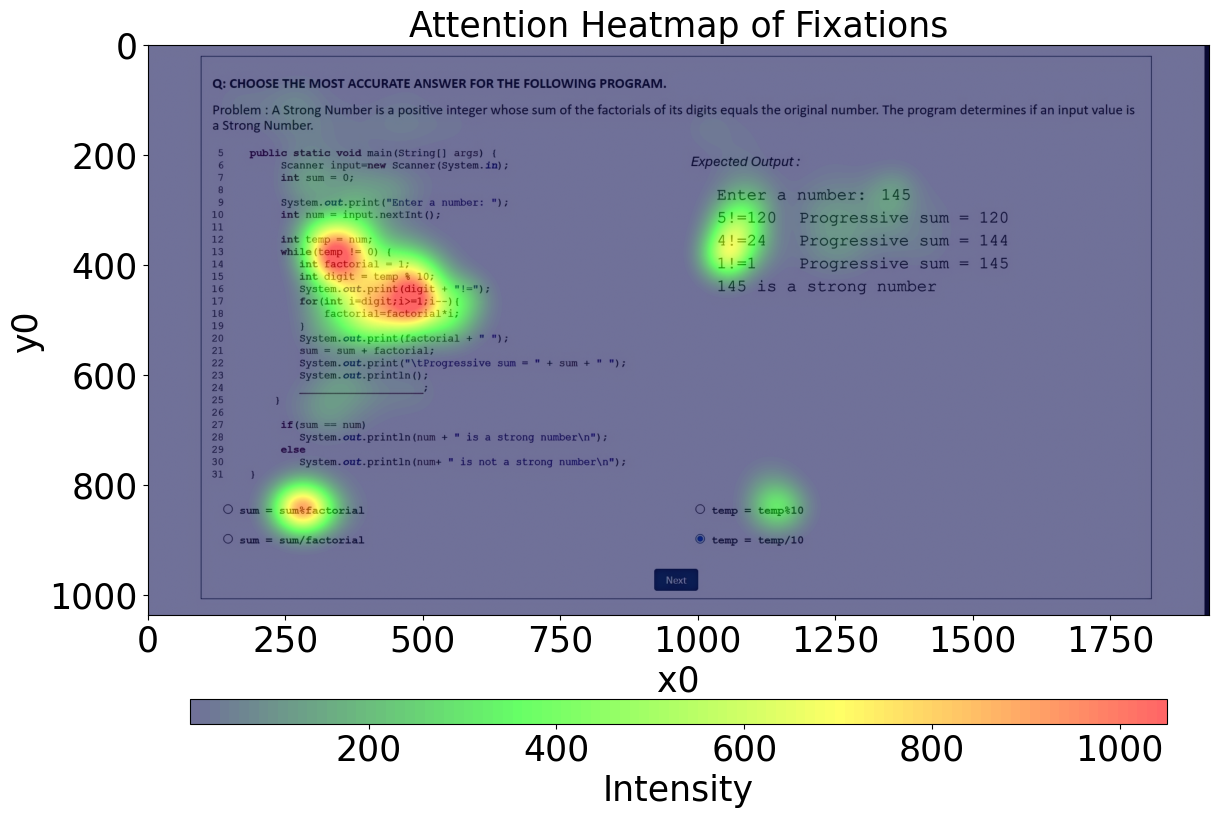

In [86]:
# default config
# visualization.draw_heatmap(trial_data,contours=False, figsize=(18, 10), 
#                            alpha=0.6, sigma_value=35, vmin=0, vmax=1200)
visualization.draw_heatmap(trial_data,contours=False,
                           figsize=(18, 10), alpha=0.6, sigma_value=30, 
                           vmin=10, vmax=1050)

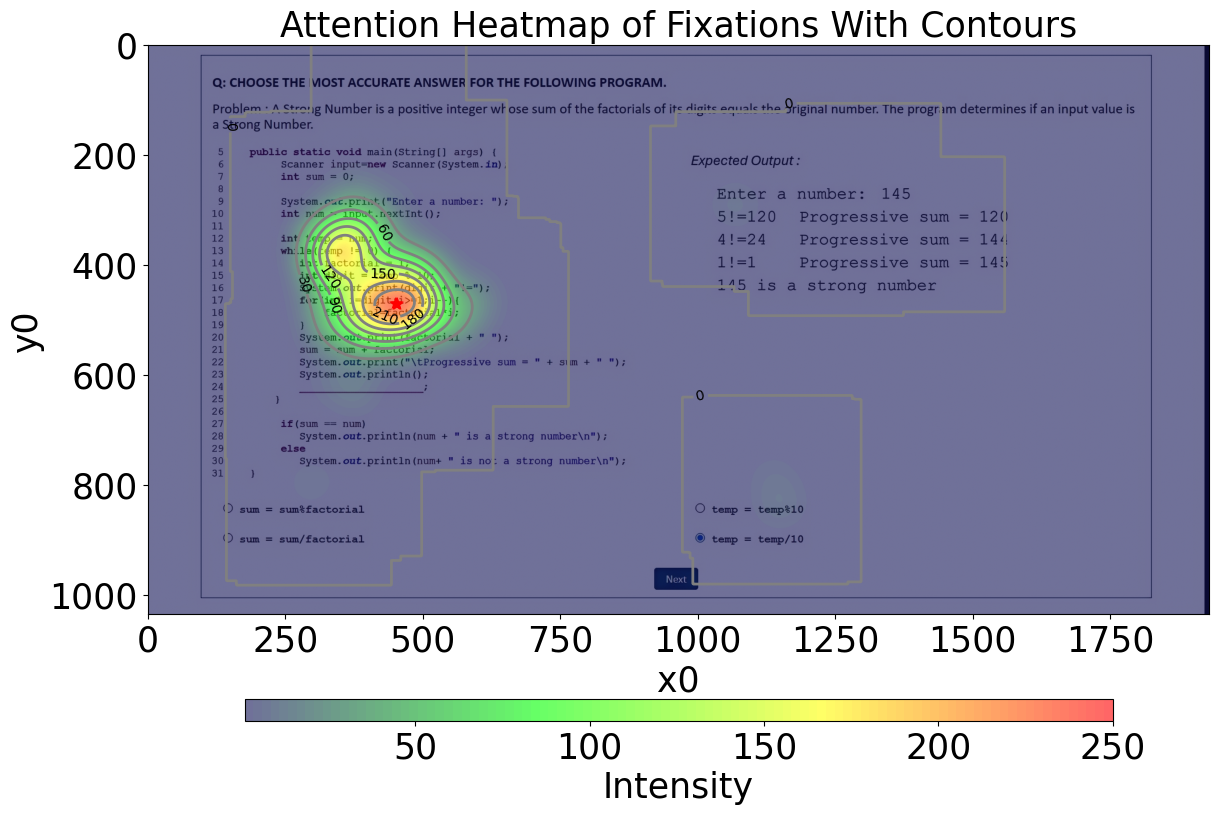

In [13]:
# default config
# visualization.draw_heatmap(trial_data,contours=True, figsize=(18, 10), 
#                            alpha=0.6, sigma_value=35, vmin=0, vmax=1200)
visualization.draw_heatmap(trial_data,contours=True,
                           figsize=(16, 10), alpha=0.6, sigma_value=35, 
                           vmin=1, vmax=250)